In [43]:
# Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from scipy.stats import linregress
%matplotlib inline

In [4]:
# Read CSV file and display df
df = pd.read_csv('cars_data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
# Checking the data type
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
# Renaming some column names
renamed_df = df.rename(columns={'Driven_Wheels': 'Drive Mode',
                                'highway MPG': 'Highway MPG',
                                'city mpg': 'City MPG', 'MSRP': 'Price' })
renamed_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [10]:
# Rows containing duplicate data
duplicate_rows_df = renamed_df[renamed_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (715, 16)


In [11]:
# Used to count the number of rows before removing the data
df.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [12]:
# Dropping the duplicates 
df1 = renamed_df.drop_duplicates()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [13]:
df1.count()

Make                 11199
Model                11199
Year                 11199
Engine Fuel Type     11196
Engine HP            11130
Engine Cylinders     11169
Transmission Type    11199
Drive Mode           11199
Number of Doors      11193
Market Category       7823
Vehicle Size         11199
Vehicle Style        11199
Highway MPG          11199
City MPG             11199
Popularity           11199
Price                11199
dtype: int64

In [15]:
# Finding the null values.
print(df1.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Drive Mode              0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
Highway MPG             0
City MPG                0
Popularity              0
Price                   0
dtype: int64


In [16]:
# Dropping irrelevant columns
df1 = df1.drop(['Market Category'], axis=1)
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,Highway MPG,City MPG,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [17]:
# Finding the null values.
print(df1.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Drive Mode            0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
Highway MPG           0
City MPG              0
Popularity            0
Price                 0
dtype: int64


In [18]:
# Dropping the missing values and showing value count
df1 = df1.dropna() 
df1.count()

Make                 11097
Model                11097
Year                 11097
Engine Fuel Type     11097
Engine HP            11097
Engine Cylinders     11097
Transmission Type    11097
Drive Mode           11097
Number of Doors      11097
Vehicle Size         11097
Vehicle Style        11097
Highway MPG          11097
City MPG             11097
Popularity           11097
Price                11097
dtype: int64

<AxesSubplot:xlabel='Price'>

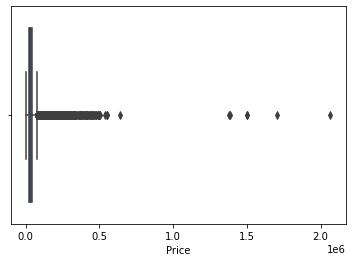

In [23]:
# Plot to look for outliers by Price
sns.boxplot(x = df1['Price'])

<AxesSubplot:xlabel='Engine HP'>

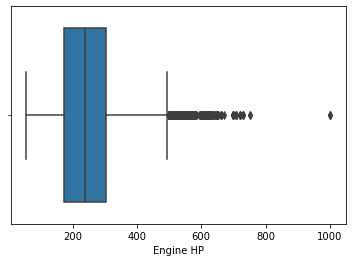

In [24]:
# Plot to look for outliers by HP
sns.boxplot(x = df1['Engine HP'])

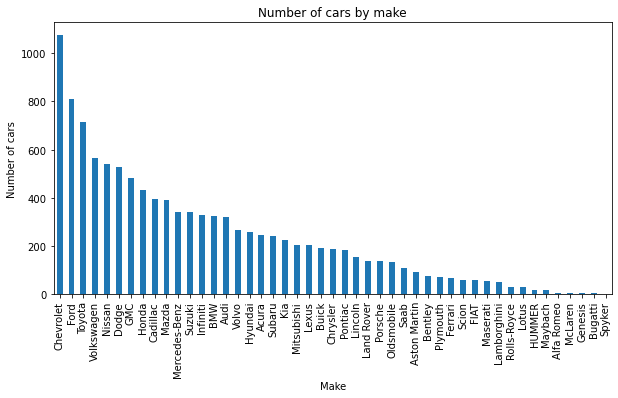

In [37]:
# Plotting a Histogram
df1.Make.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

,Year,Engine HP,Engine Cylinders,Number of Doors,Highway MPG,City MPG,Popularity,Price
Year,1.000000,0.337297,-0.026670,0.246173,0.265597,0.220053,0.086580,0.209353
Engine HP,0.337297,1.000000,0.788319,-0.128493,-0.423734,-0.474810,0.041418,0.658983
Engine Cylinders,-0.026670,0.788319,1.000000,-0.147591,-0.614703,-0.634460,0.042705,0.551988
Number of Doors,0.246173,-0.128493,-0.147591,1.000000,0.116920,0.137386,-0.058979,-0.145600
Highway MPG,0.265597,-0.423734,-0.614703,0.116920,1.000000,0.842834,-0.024927,-0.207774
City MPG,0.220053,-0.474810,-0.634460,0.137386,0.842834,1.000000,-0.007238,-0.232699
Popularity,0.086580,0.041418,0.042705,-0.058979,-0.024927,-0.007238,1.000000,-0.048490
Price,0.209353,0.658983,0.551988,-0.145600,-0.207774,-0.232699,-0.048490,1.000000


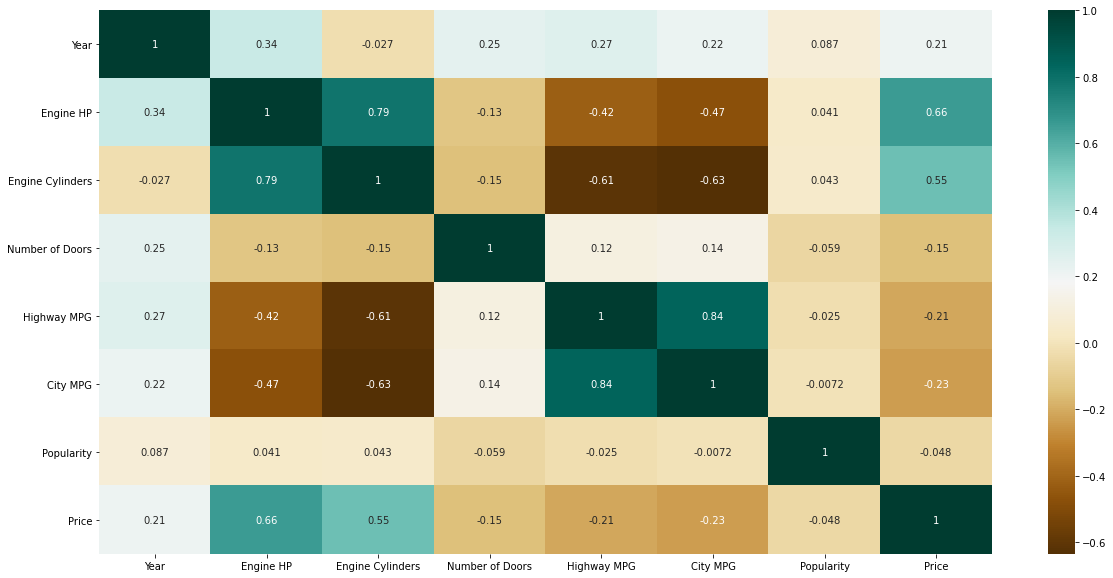

In [40]:
# Finding the relations between the variables using heatmap
plt.figure(figsize=(20,10))
c = df1.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

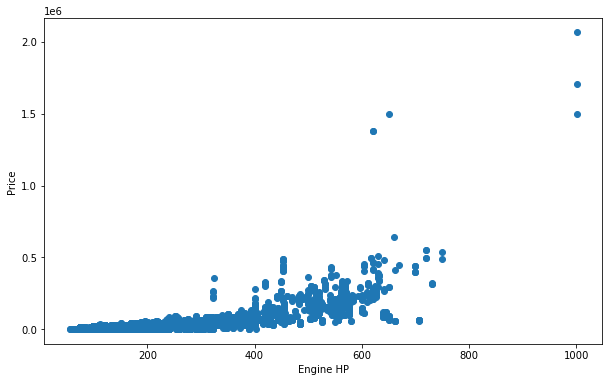

In [41]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df1['Engine HP'], df1['Price'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('Price')
plt.show()

The r-squared is: 0.4342589276567358


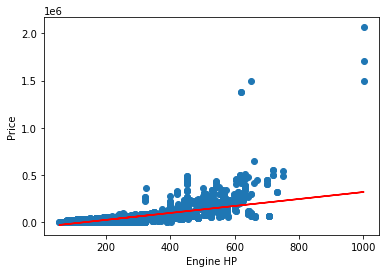

In [46]:
# Print out the r-squared value along with the plot.
x_values = df1['Engine HP']
y_values = df1['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Engine HP')
plt.ylabel('Price')
print(f"The r-squared is: {rvalue**2}")
plt.show()